In [59]:
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [60]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [61]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# Build a Decision Tree model
# You can customize the parameters according to your requirements
# For example, you can adjust 'max_depth', 'min_samples_split', etc.
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    random_state=42
)
# Train the Decision Tree model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

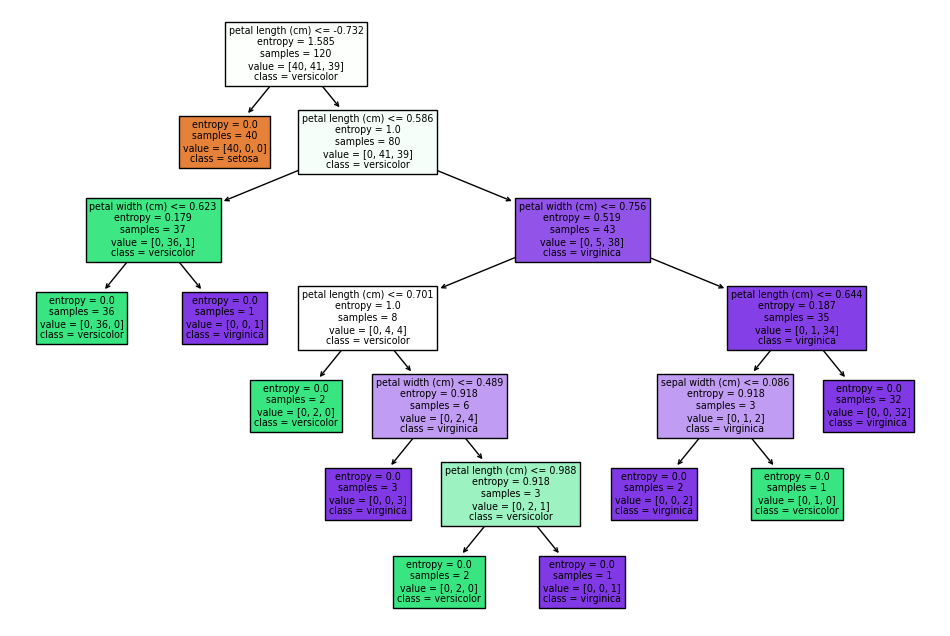

In [64]:
# Visualize the Decision Tree model
plt.figure(figsize=(12, 8))
plot_tree(
    dt_model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)
plt.show()

In [65]:
# Make predictions on the testing subset
y_pred = dt_model.predict(X_test)

Entropy value:  1.5846619079379884
Feature importance:  [0.         0.01448725 0.89540577 0.09010698]


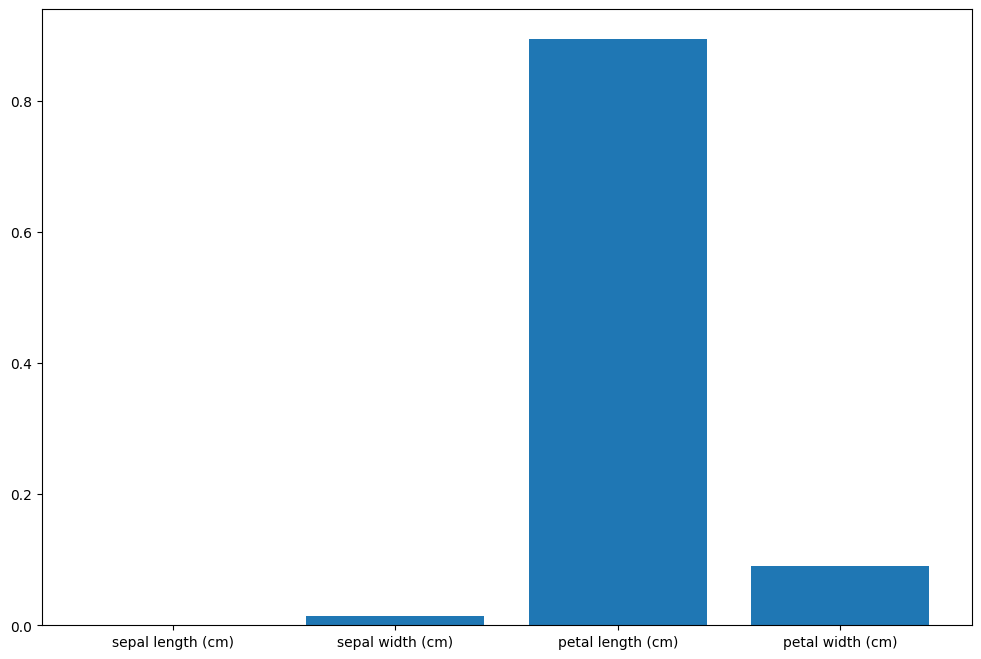

In [66]:
# show entropy value
print('Entropy value: ', dt_model.tree_.impurity[0])

# show the imporance of each feature
print('Feature importance: ', dt_model.feature_importances_)

# plot the feature importance
plt.figure(figsize=(12, 8))
plt.bar(iris.feature_names, dt_model.feature_importances_)
plt.show()

Accuracy: 1.0000
Classification Error: 0.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


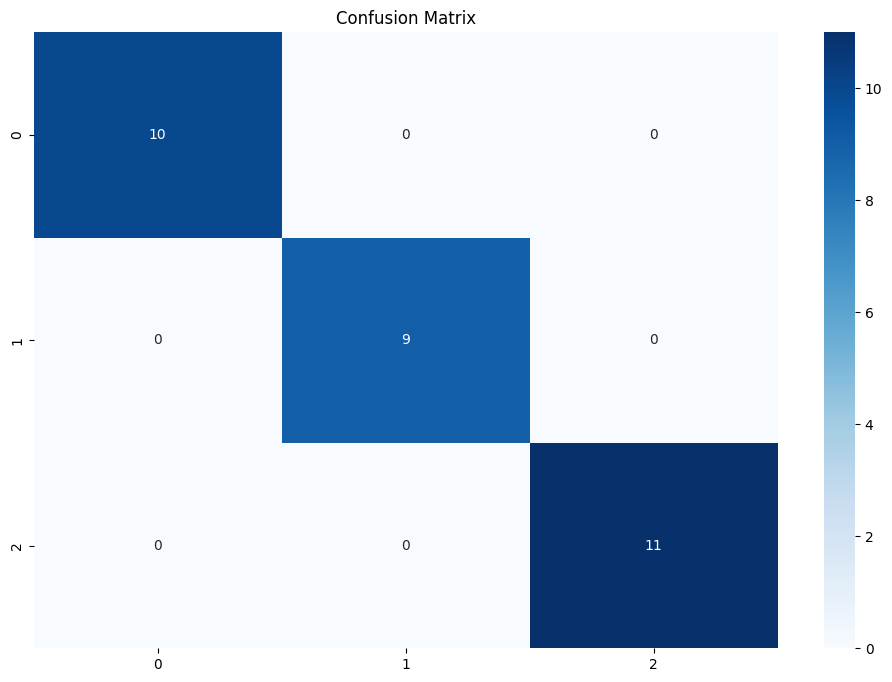

In [67]:
# Calculate the classification error
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Classification Error: {error:.4f}')

# Additional information - Classification Report
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Additional information - Confusion Matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
# plot the confusion matrix with heatmap color scheme blue
plt.figure(figsize=(12, 8))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()